In [1]:
PROJECT = "qwiklabs-gcp-ml-8d503f4cdc07"  # Replace with your PROJECT
BUCKET = PROJECT  # Replace with your BUCKET

REGION = "us-central1"            # Choose an available region for Cloud CAIP
TFVERSION = "1.14"                # TF version for CMLE to use

In [2]:
PROJ_NAME='miniproj'

In [3]:
import os
os.environ["BUCKET"] = BUCKET
os.environ["PROJECT"] = PROJECT
os.environ["REGION"] = REGION
os.environ["TFVERSION"] = TFVERSION
os.environ["PROJ_NAME"] = PROJ_NAME

In [4]:
%%bash
gcloud config set project $PROJECT
gcloud config set compute/region $REGION

Updated property [core/project].
Updated property [compute/region].


In [5]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import pandas as pd

from sklearn.model_selection import train_test_split
print(tf.__version__)

1.15.0


In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
%%bash
gsutil ls gs://${BUCKET}/data/*.csv

gs://qwiklabs-gcp-ml-8d503f4cdc07/data/creditcard.csv


In [8]:
gcs_data = pd.read_csv('gs://{}/data/creditcard.csv'.format(BUCKET))

In [9]:
gcs_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# list(gcs_data.columns.values)
list(gcs_data)

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

# 제거할 feature

In [234]:
try:
    DROP_FEATURE_NAMES=input('제거할 feature 이름들을 입력하세요:')
    if len(DROP_FEATURE_NAMES) < 1:
        DROP_FEATURE_NAMES=''
except ValueError:
    DROP_FEATURE_NAMES=''
print(DROP_FEATURE_NAMES)

제거할 feature 이름들을 입력하세요: Time,V1,V2


Time,V1,V2


In [235]:
DROP_FEATURE_NAMES

'Time,V1,V2'

In [236]:
DROP_FEATURE_NAMES=DROP_FEATURE_NAMES.split(",")
DROP_FEATURE_NAMES

['Time', 'V1', 'V2']

In [237]:
gcs_data = gcs_data.drop(DROP_FEATURE_NAMES, axis=1)
gcs_data.head()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 선택할 feature

In [15]:
try:
    SEL_FEATURE_NAMES=input('선택할 feature 이름들을 입력하세요:')
    if len(SEL_FEATURE_NAMES) < 1:
        SEL_FEATURE_NAMES=''
except ValueError:
    SEL_FEATURE_NAMES=''
print(SEL_FEATURE_NAMES)

선택할 feature 이름들을 입력하세요: V3,V4


V3,V4


In [16]:
SEL_FEATURE_NAMES=SEL_FEATURE_NAMES.split(",")
SEL_FEATURE_NAMES

['V3', 'V4']

In [17]:
filtered_data = gcs_data[SEL_FEATURE_NAMES]

In [18]:
filtered_data.head()

,V3,V4
0,2.536347,1.378155
1,0.166480,0.448154
2,1.773209,0.379780
3,1.792993,-0.863291
4,1.548718,0.403034


In [11]:
len(list(gcs_data))

31

In [12]:
FEATURE_LEN = len(list(gcs_data))
os.environ['FEATURE_LEN'] = str(FEATURE_LEN)

In [13]:
x_data = gcs_data.drop('Class', axis=1)
x_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
FEATURE_NAMES = list(x_data)
FEATURE_NAMES

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [15]:
y_data = gcs_data['Class']
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [16]:
!pwd

/home/jupyter/google-asl-study/final_mini_project/kmlee


In [17]:
## data setting
# setting up testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=27)

print('X_train : {}, X_test:{}'.format(X_train.shape, X_test.shape))
print('Y_train : {}, Y_test:{}'.format(Y_train.shape, Y_test.shape))

X_train : (227845, 30), X_test:(56962, 30)
Y_train : (227845,), Y_test:(56962,)


In [18]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=27)
print('X_train : {}, Y_train:{}'.format(X_train.shape, Y_train.shape))
print('X_valid : {}, Y_valid:{}'.format(X_valid.shape, Y_valid.shape))
print('X_test : {}, Y_test:{}'.format(X_test.shape, Y_test.shape))

X_train : (182276, 30), Y_train:(182276,)
X_valid : (45569, 30), Y_valid:(45569,)
X_test : (56962, 30), Y_test:(56962,)


In [19]:
df_train = pd.concat([X_train, Y_train],axis=1)
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
26120,33919.0,-2.388049,-2.490423,1.888346,-1.313157,0.335402,-0.743883,0.576642,-0.071353,1.228283,-1.879936,-0.251486,1.032613,1.031555,-0.620445,0.821064,-0.647349,-0.330973,0.019461,-0.625384,1.240960,0.569097,0.908894,0.826554,0.089925,0.499400,-0.707443,-0.183655,-0.052248,383.35,0
9192,13161.0,1.225984,0.212700,-0.157300,1.082289,0.840563,1.184308,-0.127604,0.139463,1.385294,-0.338083,0.619358,-1.688131,2.046750,1.532657,-1.439979,-0.066174,0.099661,0.316642,0.363952,-0.124836,-0.303960,-0.426814,-0.290104,-1.754287,0.847065,-0.263307,0.007218,-0.015656,19.08,0
230012,146147.0,-2.188785,-0.958016,0.769310,-3.102286,-0.242737,0.071822,-0.486386,0.269428,-1.919930,1.278307,0.099962,-0.325803,0.976056,-0.716159,-1.215963,0.150129,-0.247955,0.692943,-0.302583,-0.195537,-0.252410,-0.148452,-0.605173,0.213868,0.737452,-0.193485,-0.152167,0.006639,79.00,0
240894,150796.0,2.105378,0.095780,-2.263791,0.091285,0.882610,-0.338245,0.099070,-0.112726,0.483264,-0.297243,0.102136,0.111484,-0.239467,-0.532100,0.387734,0.759846,-0.276178,1.402560,0.307164,-0.185324,0.157169,0.593088,-0.190231,-1.519934,0.379331,-0.028933,-0.007032,-0.056937,1.80,0
28768,35150.0,-0.328728,-0.476626,1.429567,-0.900624,0.067534,2.167218,-0.040161,0.497778,-1.119866,0.451183,1.583027,-0.418727,-1.115596,-0.194336,0.397377,-0.873577,1.818656,-2.673224,0.918108,0.308120,0.210792,0.801463,0.142101,-1.346529,-0.619436,-0.095093,0.029224,-0.106220,96.62,0


In [20]:
df_valid = pd.concat([X_valid, Y_valid],axis=1)
df_valid.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
269400,163647.0,0.129017,1.896071,-1.909277,-0.085467,1.516371,-2.947193,1.922066,-0.649116,-0.797983,-2.458479,1.352833,-0.383150,-0.167108,-3.744940,0.259791,0.505714,3.329779,1.164543,-1.086637,-0.082993,0.046164,0.272604,-0.286842,0.621032,0.080475,0.108701,0.046224,0.123110,0.30,0
140345,83671.0,-2.810614,-1.255934,0.534252,1.833196,1.266633,-0.336898,-0.524892,0.566502,-0.583604,0.012125,0.826729,1.518163,0.901882,0.390380,-0.398843,-0.723934,0.381441,-0.170178,1.148843,0.058401,0.029318,0.150226,-0.861510,-0.163730,-0.210010,-0.245811,0.605932,-0.486416,108.86,0
234612,148046.0,1.632977,-0.650973,-0.700894,1.498131,-0.548833,-0.505637,-0.043126,-0.114222,0.870073,0.130682,-1.093137,0.001141,-0.584909,0.245689,0.420884,0.157755,-0.510354,0.006759,-0.594176,0.041657,0.142117,0.172234,0.036681,-0.121723,-0.148125,-0.681985,0.008653,-0.007497,179.00,0
69669,53524.0,-1.244625,-0.862845,0.902662,-0.220987,-1.363494,0.435640,0.255022,0.640365,-1.588047,-0.069806,0.856695,0.639223,0.512782,0.286660,-0.121909,-0.716399,-0.501456,1.866949,-2.285268,0.056128,0.227404,0.313352,0.719519,-0.067816,-0.091712,-0.451338,-0.153241,-0.125369,310.96,0
80277,58411.0,1.216248,0.217858,-0.185325,0.771201,0.106515,0.003741,-0.162653,0.071036,0.308806,-0.619671,0.665524,0.887186,0.395834,-1.518667,-0.931024,0.517252,0.555034,0.737507,0.580231,-0.003541,-0.177230,-0.274791,-0.216183,-0.543854,0.644877,0.443618,-0.000127,0.025547,12.31,0


In [21]:
df_test = pd.concat([X_test, Y_test],axis=1)
df_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47747,43343.0,1.209971,-0.158081,0.685984,-0.019681,-0.874075,-0.775662,-0.352771,0.015835,0.545579,-0.224426,0.088800,-0.203061,-1.113465,0.410833,1.607339,0.072905,0.100539,-0.831441,-0.446510,-0.176492,-0.096262,-0.294659,0.177728,0.418381,-0.039814,0.918010,-0.061961,0.007276,5.37,0
225706,144357.0,0.107350,0.718755,-0.059117,-0.821294,0.716260,-1.189281,1.338169,-0.395374,-0.185327,-0.841789,-0.908705,0.633981,0.905077,0.104062,-0.451994,-0.476546,-0.429700,-0.639710,0.121597,-0.059895,-0.043964,-0.030030,-0.042275,-0.078641,-0.157494,-0.150633,0.019411,0.036256,31.00,0
255432,157223.0,-0.992778,1.374399,-1.681843,-0.123910,0.711935,-1.394937,2.114597,-0.066849,-0.815940,-2.754625,0.025988,-0.054213,0.620262,-2.687384,0.243924,0.504939,2.327616,1.282721,-0.635943,0.364793,0.196423,0.220383,0.131703,-0.358277,0.402663,-0.552094,-0.015239,0.170879,231.05,0
202435,134327.0,2.084975,-1.678690,-0.492561,-1.592379,-1.541775,-0.284969,-1.310430,-0.051357,-1.320674,1.630477,0.589819,0.279823,1.195581,-0.541423,-0.680839,0.018269,-0.023405,0.356297,0.236777,-0.202740,-0.315913,-0.614923,0.334403,-0.383453,-0.604302,-0.494455,0.023015,-0.032347,95.94,0
119363,75422.0,1.176209,0.183813,0.514542,0.450080,-0.197021,-0.187294,-0.091779,0.056852,-0.280994,0.047212,1.773171,1.363238,0.625851,0.381332,0.537814,0.187727,-0.419805,-0.546371,-0.189620,-0.088922,-0.173952,-0.483480,0.149046,0.023991,0.129106,0.105646,-0.013529,0.006163,0.99,0


In [22]:
df_test.to_csv('test.csv', index=False)

In [23]:
df_valid.to_csv('valid.csv', index=False)

In [24]:
df_train.to_csv('train.csv', index=False)

In [25]:
df_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47747,43343.0,1.209971,-0.158081,0.685984,-0.019681,-0.874075,-0.775662,-0.352771,0.015835,0.545579,-0.224426,0.088800,-0.203061,-1.113465,0.410833,1.607339,0.072905,0.100539,-0.831441,-0.446510,-0.176492,-0.096262,-0.294659,0.177728,0.418381,-0.039814,0.918010,-0.061961,0.007276,5.37,0
225706,144357.0,0.107350,0.718755,-0.059117,-0.821294,0.716260,-1.189281,1.338169,-0.395374,-0.185327,-0.841789,-0.908705,0.633981,0.905077,0.104062,-0.451994,-0.476546,-0.429700,-0.639710,0.121597,-0.059895,-0.043964,-0.030030,-0.042275,-0.078641,-0.157494,-0.150633,0.019411,0.036256,31.00,0
255432,157223.0,-0.992778,1.374399,-1.681843,-0.123910,0.711935,-1.394937,2.114597,-0.066849,-0.815940,-2.754625,0.025988,-0.054213,0.620262,-2.687384,0.243924,0.504939,2.327616,1.282721,-0.635943,0.364793,0.196423,0.220383,0.131703,-0.358277,0.402663,-0.552094,-0.015239,0.170879,231.05,0
202435,134327.0,2.084975,-1.678690,-0.492561,-1.592379,-1.541775,-0.284969,-1.310430,-0.051357,-1.320674,1.630477,0.589819,0.279823,1.195581,-0.541423,-0.680839,0.018269,-0.023405,0.356297,0.236777,-0.202740,-0.315913,-0.614923,0.334403,-0.383453,-0.604302,-0.494455,0.023015,-0.032347,95.94,0
119363,75422.0,1.176209,0.183813,0.514542,0.450080,-0.197021,-0.187294,-0.091779,0.056852,-0.280994,0.047212,1.773171,1.363238,0.625851,0.381332,0.537814,0.187727,-0.419805,-0.546371,-0.189620,-0.088922,-0.173952,-0.483480,0.149046,0.023991,0.129106,0.105646,-0.013529,0.006163,0.99,0


# 코드 생성 후 아래 코드 실행

In [26]:
!pwd

/home/jupyter/google-asl-study/final_mini_project/kmlee


## 모델 이름 명시

In [30]:
try:
    MODEL_NAME=input('모델 이름을 이력하세요:')
    if len(MODEL_NAME) < 1:
        MODEL_NAME='linear'
except ValueError:
    MODEL_NAME='linear'
os.environ["MODEL_NAME"] = MODEL_NAME
print(MODEL_NAME)

모델 이름을 이력하세요: dnn


dnn


In [31]:
%%bash
# MODEL_NAME=linear
DATADIR=$(pwd)
OUTDIR=$(pwd)/trained_${MODEL_NAME}/${PROJ_NAME}
rm -rf $OUTDIR
gcloud ai-platform local train \
   --module-name=${PROJ_NAME}.trainer.task \
   --package-path=${PWD}/${PROJ_NAME}.trainer \
   -- \
   --train_data_path="${DATADIR}/train.csv" \
   --eval_data_path="${DATADIR}/valid.csv"  \
   --output_dir=${OUTDIR} \
   --model=${MODEL_NAME} --train_steps=300 --feature_length=$FEATURE_LEN \
   --nnsize='128,64,8'

Will use DNN size of [128, 64, 8]
<DatasetV1Adapter shapes: ({Class: (30,)}, ()), types: ({Class: tf.float32}, tf.float32)>
NNSIZE:[128, 64, 8]
<DatasetV1Adapter shapes: ({Class: (30,)}, ()), types: ({Class: tf.float32}, tf.float32)>
NNSIZE:[128, 64, 8]
NNSIZE:[128, 64, 8]


2019-12-12 03:49:02.644881: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0



INFO:tensorflow:TF_CONFIG environment variable: {u'environment': u'cloud', u'cluster': {}, u'job': {u'args': [u'--train_data_path=/home/jupyter/google-asl-study/final_mini_project/kmlee/train.csv', u'--eval_data_path=/home/jupyter/google-asl-study/final_mini_project/kmlee/valid.csv', u'--output_dir=/home/jupyter/google-asl-study/final_mini_project/kmlee/trained_dnn/miniproj', u'--model=dnn', u'--train_steps=300', u'--feature_length=31', u'--nnsize=128,64,8'], u'job_name': u'miniproj.trainer.task'}, u'task': {}}
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 60, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f306d5c2e50>, '_model_dir': '/home/jupyter/google-asl-study/final_mini_

In [259]:
%%bash
gsutil -m rm -rf gs://${BUCKET}/${PROJ_NAME}/data/*
gsutil -m cp $(pwd)/*.csv gs://${BUCKET}/${PROJ_NAME}/data/

Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/data/test.csv#1575874206268687...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/data/train.csv#1575874208389297...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/data/valid.csv#1575874205954115...
/ [3/3 objects] 100% Done                                                       
Operation completed over 3 objects.                                              
Copying file:///home/jupyter/google-asl-study/final_mini_project/kmlee/test.csv [Content-Type=text/csv]...
Copying file:///home/jupyter/google-asl-study/final_mini_project/kmlee/train.csv [Content-Type=text/csv]...
Copying file:///home/jupyter/google-asl-study/final_mini_project/kmlee/valid.csv [Content-Type=text/csv]...
| [3/3 files][136.3 MiB/136.3 MiB] 100% Done                                    
Operation completed over 3 objects/136.3 MiB.                                    


In [260]:
%%bash
for MODEL in dnn; do
  OUTDIR=gs://${BUCKET}/${PROJ_NAME}/${MODEL}
  JOBNAME=${PROJ_NAME}_${MODEL}_$(date -u +%y%m%d_%H%M%S)
  gsutil -m rm -rf $OUTDIR
  gcloud ai-platform jobs submit training $JOBNAME \
     --region=$REGION \
     --module-name=trainer.task \
     --package-path=${PWD}/${PROJ_NAME}/trainer \
     --job-dir=$OUTDIR \
     --scale-tier=BASIC \
     --runtime-version=$TFVERSION \
     -- \
     --train_data_path="gs://${BUCKET}/${PROJ_NAME}/data/train.csv" \
     --eval_data_path="gs://${BUCKET}/${PROJ_NAME}/data/valid.csv"  \
     --output_dir=$OUTDIR \
     --nnsize='128,64' \
     --train_steps=3000 --feature_length=$FEATURE_LEN --model=$MODEL
done

jobId: miniproj_dnn_191212_005848
state: QUEUED


Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/dnn/checkpoint#1576062473602531...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/dnn/eval/#1576062486075127...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/dnn/eval/events.out.tfevents.1576062486.cmle-training-12698819006116578485#1576062487987531...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/dnn/events.out.tfevents.1576062400.cmle-training-12698819006116578485#1576062498686361...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/dnn/export/#1576062489043758...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/dnn/export/exporter/#1576062489575046...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/dnn/export/exporter/1576062488/#1576062496257119...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/dnn/export/exporter/1576062488/saved_model.pb#1576062496650334...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/dnn/export/exporter/1576062488/variables/#1576062497085645...
Removing gs://qwiklabs-gcp-ml

In [22]:
OUTDIR='gs://{}/{}/{}'.format(BUCKET,PROJ_NAME,'dnn')
OUTDIR   

'gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/dnn'

In [261]:
loaded_model = tf.contrib.predictor.from_saved_model('gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/dnn/export/exporter/1576112569')

INFO:tensorflow:Restoring parameters from gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/dnn/export/exporter/1576112569/variables/variables


# Vaild data Metric

[[45486     0]
 [   83     0]]


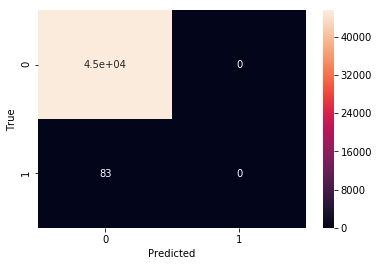

In [262]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def get_predictions(loaded_model, input_fn):
    result =loaded_model({'Class':input_fn})
    return result['probabilities']

def eval_input_fn(csv_path):
    from numpy import genfromtxt
    data = genfromtxt(csv_path, delimiter=',')
    data = data[1:,:-1]
    return data

LABELS = ["0", "1"]

df_eval = pd.read_csv('./valid.csv')

# Create a confusion matrix on training data.
with tf.Graph().as_default():
    cm = tf.confusion_matrix(df_eval["Class"],get_predictions(loaded_model, eval_input_fn('./valid.csv')))
    with tf.Session() as session:
        cm_out = session.run(cm)
        print(cm_out)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) 
# / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");

# Test data Metric

[[56858     0]
 [  104     0]]


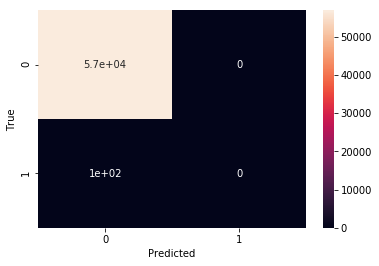

In [263]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def get_predictions(estimator, input_fn):
    result =loaded_model({'Class':input_fn})
    return result['probabilities']

def eval_input_fn(csv_path):
    from numpy import genfromtxt
    data = genfromtxt(csv_path, delimiter=',')
    data = data[1:,:-1]
    return data

LABELS = ["0", "1"]

df_eval = pd.read_csv('./test.csv')

# Create a confusion matrix on training data.
with tf.Graph().as_default():
    cm = tf.confusion_matrix(df_eval["Class"],get_predictions(loaded_model, eval_input_fn('./test.csv')))
    with tf.Session() as session:
        cm_out = session.run(cm)
        print(cm_out)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) 
# / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");

<h2> Hyperparameter tuning</h2>

In [23]:
%%writefile hyperparam.yaml
trainingInput:
    scaleTier: PREMIUM_1
    hyperparameters:
        hyperparameterMetricTag: RMSE
        goal: MINIMIZE
        maxTrials: 2
        maxParallelTrials: 1
        enableTrialEarlyStopping: True
        params:
        - parameterName: nnsize
          type: CATEGORICAL
          categoricalValues:
          - 128,64,32
          - 64,32,8

Overwriting hyperparam.yaml


In [24]:
try:
    MODEL_NAME=input('모델 이름을 이력하세요:')
    if len(MODEL_NAME) < 1:
        MODEL_NAME='dnn'
except ValueError:
    MODEL_NAME='dnn'
os.environ["MODEL_NAME"] = MODEL_NAME
print(MODEL_NAME)

모델 이름을 이력하세요: 


dnn


In [25]:
%%bash
OUTDIR=gs://${BUCKET}/${PROJ_NAME}/hyperparam
JOBNAME=${PROJ_NAME}_${MODEL_NAME}_$(date -u +%y%m%d_%H%M%S)
echo $OUTDIR $REGION $JOBNAME
gsutil -m rm -rf $OUTDIR
gcloud ai-platform jobs submit training $JOBNAME \
    --region=$REGION \
    --module-name=trainer.task \
    --package-path=${PWD}/${PROJ_NAME}/trainer \
    --job-dir=$OUTDIR \
    --staging-bucket=gs://$BUCKET \
    --scale-tier=PREMIUM_1 \
    --config=hyperparam.yaml \
    --runtime-version=$TFVERSION \
    -- \
    --train_data_path="gs://${BUCKET}/${PROJ_NAME}/data/train.csv" \
    --eval_data_path="gs://${BUCKET}/${PROJ_NAME}/data/valid.csv"  \
    --output_dir=$OUTDIR \
    --train_steps=3000 --feature_length=$FEATURE_LEN --model=$MODEL_NAME

gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/hyperparam us-central1 miniproj_dnn_191210_072035
jobId: miniproj_dnn_191210_072035
state: QUEUED


Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/hyperparam/#1575953639865533...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/hyperparam/1/#1575953640317340...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/hyperparam/1/checkpoint#1575953690939529...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/hyperparam/1/eval/#1575953701512394...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/hyperparam/1/eval/events.out.tfevents.1575953701.cmle-training-master-af2eb73225-0-c7j8h#1575953703618727...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/hyperparam/1/events.out.tfevents.1575953640.cmle-training-worker-af2eb73225-0-bd447#1575953690589276...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/hyperparam/1/events.out.tfevents.1575953641.cmle-training-master-af2eb73225-0-c7j8h#1575953641764378...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/hyperparam/1/export/#1575953704636085...
Removing gs://qwiklabs-gcp-ml-8d503f4cdc07/miniproj/hyperparam/1/export/expor

# Repeat training

In [ ]:
%%bash
OUTDIR=gs://${BUCKET}/${PROJ_NAME}/trained_model_${MODEL_NAME}_tuned
JOBNAME=${PROJ_NAME}_$(date -u +%y%m%d_%H%M%S)
echo $OUTDIR $REGION $JOBNAME
gsutil -m rm -rf $OUTDIR
gcloud ai-platform jobs submit training $JOBNAME \
    --region=$REGION \
    --module-name=trainer.task \
    --package-path=${PWD}/${PROJ_NAME}/trainer \
    --job-dir=$OUTDIR \
    --staging-bucket=gs://$BUCKET \
    --scale-tier=PREMIUM_1 \
    --config=hyperparam.yaml \
    --runtime-version=$TFVERSION \
    -- \
    --train_data_path="gs://${BUCKET}/${PROJ_NAME}/data/train.csv" \
    --eval_data_path="gs://${BUCKET}/${PROJ_NAME}/data/valid.csv"  \
    --output_dir=$OUTDIR \
    --train_steps=3000 --feature_length=$FEATURE_LEN --model=$MODEL_NAME \
    --train_batch_size= --nnsize=''

# 코드 생성

In [18]:
%%bash
mkdir -p ${PROJ_NAME}/trainer
touch ${PROJ_NAME}/__init__.py
touch ${PROJ_NAME}/trainer/__init__.py

In [27]:
%%writefile {PROJ_NAME}/trainer/task.py
# Copyright 2017 Google Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""Example implementation of code to run on the Cloud ML service.
"""

import traceback
import argparse
import json
import os
from . import model

if __name__ == '__main__':
  parser = argparse.ArgumentParser()
  # Input Arguments
  parser.add_argument(
      '--train_data_path',
      help='GCS or local path to training data',
      required=True
  )
  parser.add_argument(
      '--eval_data_path',
      help='GCS or local path to evaluation data',
      required=True
  )
  parser.add_argument(
      '--train_batch_size',
      help='Batch size for training steps',
      type=int,
      default=100
  )
  parser.add_argument(
        "--nnsize",
        help="Hidden layer sizes to use for DNN feature columns -- provide \
        space-separated layers",
        type=str,
        default='128,32,4'
  )
  parser.add_argument(
      '--learning_rate',
      help='Initial learning rate for training',
      type=float,
      default=0.01
  )
  parser.add_argument(
      '--train_steps',
      help="""\
      Steps to run the training job for. A step is one batch-size,\
      """,
      type=int,
      default=0
  )
  parser.add_argument(
      '--feature_length',
      help="""\
      This model works with fixed length sequences. 1-(N-1) are inputs, last is output
      """,
      type=int,
      default=10
  )
  parser.add_argument(
      '--output_dir',
      help='GCS location to write checkpoints and export models',
      required=True
  )
  model_names = [name.replace('_model','') \
                   for name in dir(model) \
                     if name.endswith('_model')]
  parser.add_argument(
      '--model',
      help='Type of model. Supported types are {}'.format(model_names),
      required=True
  )
  parser.add_argument(
      '--job-dir',
      help='this model ignores this field, but it is required by gcloud',
      default='junk'
  )
  parser.add_argument(
      '--eval_delay_secs',
      help='How long to wait before running first evaluation',
      default=10,
      type=int
  )
  parser.add_argument(
      '--min_eval_frequency',
      help='Minimum number of training steps between evaluations',
      default=60,
      type=int
  )

  args = parser.parse_args()
  hparams = args.__dict__
  
  # unused args provided by service
  hparams.pop('job_dir', None)
  hparams.pop('job-dir', None)

  output_dir = hparams.pop('output_dir')
  model.BATCH_SIZE = hparams['train_batch_size']
  model.NNSIZE = list(map(int, hparams.pop("nnsize").split(",")))
  print ("Will use DNN size of {}".format(model.NNSIZE))

  # Append trial_id to path if we are doing hptuning
  # This code can be removed if you are not using hyperparameter tuning
  output_dir = os.path.join(
      output_dir,
      json.loads(
          os.environ.get('TF_CONFIG', '{}')
      ).get('task', {}).get('trial', '')
  )

  # calculate train_steps if not provided
  if hparams['train_steps'] < 1:
     # 1,000 steps at batch_size of 100
     hparams['train_steps'] = (1000 * 100) // hparams['train_batch_size']
     print ("Training for {} steps".format(hparams['train_steps']))

  model.init(hparams)

  # Run the training job
  model.train_and_evaluate(output_dir, hparams)


Overwriting miniproj/trainer/task.py


In [ ]:
%%writefile {PROJ_NAME}/trainer/model.py
#!/usr/bin/env python

# Copyright 2017 Google Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)

LABLE_COL = 'Class'
NCLASSES = 2
N_OUTPUTS = 1  # in each sequence, 1-49 are features, and 50 is label
FEATURE_LEN = None
DEFAULTS = None
N_INPUTS = None
BATCH_SIZE = 512
NNSIZE = [64, 16, 4]


def init(hparams):
    global FEATURE_LEN, DEFAULTS, N_INPUTS
    FEATURE_LEN = hparams['feature_length']
    DEFAULTS = [[0.0] for x in range(0, FEATURE_LEN-1)] +[[0.0]]
    N_INPUTS = FEATURE_LEN - N_OUTPUTS


def linear_model(features, mode, params):
    X = features[LABLE_COL]
    predictions = tf.layers.dense(X, NCLASSES, activation=None)
    return predictions, NCLASSES


def dnn_model(features, mode, params):
    X = features[LABLE_COL]
    #X = tf.Print(X, [tf.shape(X)], summarize=-1, message="X features\n\n")
    #X = tf.reshape(tensor = X, shape = [-1, N_INPUTS])
    print('NNSIZE:{}'.format(NNSIZE))
    for unit_num in NNSIZE:
        X = tf.layers.dense(X, units=unit_num, activation=tf.nn.relu)
#     predictions = tf.layers.dense(X, 1, activation=tf.nn.sigmoid)  
    predictions = tf.layers.dense(X, 1, activation=None) # linear output: regression
    #predictions = tf.Print(predictions, [tf.shape(predictions)], summarize=-1, message="\n\npredictions shape")
    return predictions, NCLASSES

def cnn_model(features, mode, params):
    X = tf.reshape(features[LABLE_COL],
                   [-1, N_INPUTS, 1])  # as a 1D "sequence" with only one time-series observation (height)
    c1 = tf.layers.conv1d(X, filters=N_INPUTS // 2,
                          kernel_size=3, strides=1,
                          padding='same', activation=tf.nn.relu)
    p1 = tf.layers.max_pooling1d(c1, pool_size=2, strides=2)

    c2 = tf.layers.conv1d(p1, filters=N_INPUTS // 2,
                          kernel_size=3, strides=1,
                          padding='same', activation=tf.nn.relu)
    p2 = tf.layers.max_pooling1d(c2, pool_size=2, strides=2)

    outlen = p2.shape[1] * p2.shape[2]
    c2flat = tf.reshape(p2, [-1, outlen])
    h1 = tf.layers.dense(c2flat, 3, activation=tf.nn.relu)
    predictions = tf.layers.dense(h1, 1, activation=None)  # linear output: regression
    return predictions


def rnn_model(features, mode, params):
    CELL_SIZE = N_INPUTS // 3  # size of the internal state in each of the cells

    # 1. dynamic_rnn needs 3D shape: [BATCH_SIZE, N_INPUTS, 1]
    x = tf.reshape(features[LABLE_COL], [-1, N_INPUTS, 1])

    # 2. configure the RNN
    cell = tf.nn.rnn_cell.GRUCell(CELL_SIZE)
    outputs, state = tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)

    # 3. pass rnn output through a dense layer
    h1 = tf.layers.dense(state, N_INPUTS // 2, activation=tf.nn.relu)
    predictions = tf.layers.dense(h1, 1, activation=None)  # (?, 1)
    return predictions


# 2-layer RNN
def rnn2_model(features, mode, params):
    # dynamic_rnn needs 3D shape: [BATCH_SIZE, N_INPUTS, 1]
    x = tf.reshape(features[LABLE_COL], [-1, N_INPUTS, 1])

    # 2. configure the RNN
    cell1 = tf.nn.rnn_cell.GRUCell(N_INPUTS * 2)
    cell2 = tf.nn.rnn_cell.GRUCell(N_INPUTS // 2)
    cells = tf.nn.rnn_cell.MultiRNNCell([cell1, cell2])
    outputs, state = tf.nn.dynamic_rnn(cells, x, dtype=tf.float32)
    # 'state' is now a tuple containing the final state of each cell layer
    # we use state[1] below to extract the final state of the final layer
    
    # 3. pass rnn output through a dense layer
    h1 = tf.layers.dense(state[1], cells.output_size // 2, activation=tf.nn.relu)
    predictions = tf.layers.dense(h1, 1, activation=None)  # (?, 1)
    return predictions


# create N-1 predictions
def rnnN_model(features, mode, params):
    # dynamic_rnn needs 3D shape: [BATCH_SIZE, N_INPUTS, 1]
    x = tf.reshape(features[LABLE_COL], [-1, N_INPUTS, 1])

    # 2. configure the RNN
    cell1 = tf.nn.rnn_cell.GRUCell(N_INPUTS * 2)
    cell2 = tf.nn.rnn_cell.GRUCell(N_INPUTS // 2)
    cells = tf.nn.rnn_cell.MultiRNNCell([cell1, cell2])
    outputs, state = tf.nn.dynamic_rnn(cells, x, dtype=tf.float32)
    # 'outputs' contains the state of the final layer for every time step
    # not just the last time step (?,N_INPUTS, final cell size)
    
    # 3. pass state for each time step through a DNN, to get a prediction
    # for each time step 
    h1 = tf.layers.dense(outputs, cells.output_size, activation=tf.nn.relu)
    h2 = tf.layers.dense(h1, cells.output_size // 2, activation=tf.nn.relu)
    predictions = tf.layers.dense(h2, 1, activation=None)  # (?, N_INPUTS, 1)
    predictions = tf.reshape(predictions, [-1, N_INPUTS])
    return predictions # return prediction for each time step


# read data and convert to needed format
def read_dataset(filename, mode, batch_size=512):
    def _input_fn():
        def decode_csv(row):
            # row is a string tensor containing the contents of one row
            features = tf.decode_csv(row, record_defaults=DEFAULTS)  # string tensor -> list of 50 rank 0 float tensors
            label = features.pop()  # remove last feature and use as label
            features = tf.stack(features)  # list of rank 0 tensors -> single rank 1 tensor
            return {LABLE_COL: features}, label

        # Create list of file names that match "glob" pattern (i.e. data_file_*.csv)
        dataset = tf.data.Dataset.list_files(filename)
        # Read in data from files
        dataset = dataset.flat_map(tf.data.TextLineDataset)
        # Parse text lines as comma-separated values (CSV)
        
        dataset = dataset.skip(1).map(decode_csv)
        print(dataset)

        if mode == tf.estimator.ModeKeys.TRAIN:
            num_epochs = None  # loop indefinitely
            dataset = dataset.shuffle(buffer_size=10 * batch_size)
        else:
            num_epochs = 1  # end-of-input after this

        dataset = dataset.repeat(num_epochs).batch(batch_size)
        return dataset.make_one_shot_iterator().get_next()

    return _input_fn


def serving_input_fn():
    feature_placeholders = {
        LABLE_COL: tf.placeholder(tf.float32, [None, FEATURE_LEN-1])
    }

    features = {
        key: tf.expand_dims(tensor, axis=-1)
        for key, tensor in feature_placeholders.items()
    }
    
#     features[LABLE_COL] = tf.expand_dims(features[LABLE_COL], axis = 0)
#     features[LABLE_COL] = {LABLE_COL: tf.expand_dims(input = feature_placeholders[LABLE_COL], axis = -1)} 
    features[LABLE_COL] = tf.squeeze(features[LABLE_COL], axis=[2])
#     features[LABLE_COL] = tf.Print(features[LABLE_COL], [tf.shape(features[LABLE_COL])], summarize=-1, message="\n\nfeatures[LABLE_COL]")
#     features[LABLE_COL] = {LABLE_COL: tf.expand_dims(input = feature_placeholders[LABLE_COL], axis = -1)} 
#     features = {LABLE_COL: tf.expand_dims(input = feature_placeholders[LABLE_COL], axis = -1)} 
    

    return tf.estimator.export.ServingInputReceiver(features, feature_placeholders)


def compute_errors(features, labels, predictions):
    labels = tf.expand_dims(labels, -1)  # rank 1 -> rank 2 to match rank of predictions

    if predictions.shape[1] == 1:
        loss = tf.losses.mean_squared_error(labels, predictions)
        rmse = tf.metrics.root_mean_squared_error(labels, predictions)
        return loss, rmse
    else:
        # one prediction for every input in sequence
        # get 1-N of (x + label)
        labelsN = tf.concat([features[LABLE_COL], labels], axis=1)
        labelsN = labelsN[:, 1:]
        # loss is computed from the last 1/3 of the series
        N = (2 * N_INPUTS) // 3
        loss = tf.losses.mean_squared_error(labelsN[:, N:], predictions[:, N:])
        # rmse is computed from last prediction and last label
        lastPred = predictions[:, -1]
        rmse = tf.metrics.root_mean_squared_error(labels, lastPred)
        return loss, rmse

# RMSE when predicting same as last value
def same_as_last_benchmark(features, labels):
    predictions = features[LABLE_COL][:,-1] # last value in input sequence
    return tf.metrics.root_mean_squared_error(labels, predictions)


# create the inference model
def data_regressor(features, labels, mode, params):
    # 1. run the appropriate model
    model_functions = {
        'linear': linear_model,
        'dnn': dnn_model,
        'cnn': cnn_model,
        'rnn': rnn_model,
        'rnn2': rnn2_model,
        'rnnN': rnnN_model}
    model_function = model_functions[params['model']]
    ylogits, nclasses = model_function(features, mode, params)
#     ylogits = tf.Print(ylogits, [tf.shape(ylogits), ylogits], summarize=-1, message="\n\nylogits shape")
#     labels = tf.expand_dims(labels, -1)
#     labels = tf.Print(labels, [tf.shape(labels), labels], summarize=-1, message="\n\nlabels shape")
    probabilities = ylogits #tf.nn.softmax(logits = ylogits) #ylogits
    class_ids = tf.cast(x = tf.argmax(input = ylogits, axis = 1), dtype = tf.uint8)
    
    if mode == tf.estimator.ModeKeys.TRAIN or mode == tf.estimator.ModeKeys.EVAL:
        loss = tf.reduce_mean(input_tensor = tf.nn.sigmoid_cross_entropy_with_logits(logits = ylogits,
                                                                                        labels = tf.expand_dims(labels, -1)))
#         loss = tf.reduce_mean(input_tensor = tf.nn.softmax_cross_entropy_with_logits_v2(logits = ylogits,
#                                                                                         labels = tf.one_hot(indices = labels, depth = NCLASSES)))
        
        if mode == tf.estimator.ModeKeys.TRAIN:
            # This is needed for batch normalization, but has no effect otherwise
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
            with tf.control_dependencies(update_ops):
                train_op = tf.contrib.layers.optimize_loss(
                    loss = loss, 
                    global_step = tf.train.get_global_step(),
                    learning_rate = params["learning_rate"], 
                    optimizer = "Adam")
            eval_metric_ops = None
        else:
            train_op = None
            eval_metric_ops =  {"accuracy": tf.metrics.accuracy(labels = labels,
                                                                predictions = class_ids)}
#             eval_metric_ops =  {"accuracy": tf.metrics.accuracy(labels = tf.argmax(input = labels, axis = 1),
#                                                                 predictions = class_ids)}
    else:
        loss = None
        train_op = None
        eval_metric_ops = None
 
    predictions_dict = {"probabilities": probabilities}
    return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions=predictions_dict,  #"class_ids": class_ids},
        loss = loss,
        train_op = train_op,
        eval_metric_ops = eval_metric_ops,
        export_outputs = {"predictions":tf.estimator.export.PredictOutput(predictions_dict)}
    )


def train_and_evaluate(output_dir, hparams):
    tf.summary.FileWriterCache.clear() # ensure filewriter cache is clear for TensorBoard events file
    get_train = read_dataset(hparams['train_data_path'],
                             tf.estimator.ModeKeys.TRAIN,
                             hparams['train_batch_size'])
    get_valid = read_dataset(hparams['eval_data_path'],
                             tf.estimator.ModeKeys.EVAL,
                             100)
    estimator = tf.estimator.Estimator(model_fn=data_regressor,
                                       params=hparams,
                                       config=tf.estimator.RunConfig(
                                           log_step_count_steps=10,
                                           save_checkpoints_secs=
                                           hparams['min_eval_frequency']),
                                       model_dir=output_dir)
    train_spec = tf.estimator.TrainSpec(input_fn=get_train,
                                        max_steps=hparams['train_steps'])
    exporter = tf.estimator.LatestExporter('exporter', serving_input_fn)
    eval_spec = tf.estimator.EvalSpec(input_fn=get_valid,
                                      steps=None,
                                      exporters=exporter,
                                      start_delay_secs=0, #hparams['eval_delay_secs'],
                                      throttle_secs=1, #hparams['min_eval_frequency']
                                     )
    tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)


# End